## Imports

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from impedance.models.circuits import CustomCircuit
# from impedance.visualization import plot_nyquist # Kept if you want to switch plotting methods

## Data Loading

In [46]:
# --- Data Loading ---

def lpr_cor_import(filename):
    """ Import cor file as pandas dataframe."""
    return pd.read_csv(
        filename,
        skiprows=26,
        sep='\s+',
        header=None,
        names=["E", "i", "T"],
    ) #index_col="Freq")
    
try:
    LPR_CS_1_df = lpr_cor_import("Cast_Stellite1_Sample1_Actual/LPR.cor")
    LPR_CS_2_df = lpr_cor_import("Cast_Stellite1_Sample2_Actual/LPR.cor")
    LPR_CS_3_df = lpr_cor_import("Cast_Stellite1_Sample3_Actual/LPR.cor")
    LPR_HS_1_df = lpr_cor_import("HIPed_Stellite1_Sample1_Actual/LPR.cor")    
    LPR_HS_2_df = lpr_cor_import("HIPed_Stellite1_Sample1_Actual/LPR_2.cor")    
    
except FileNotFoundError as e:
    print(f"Error: File was not found.")
    print(e.message)
    print(e.args)
    exit()
except Exception as e:
    print(f"Error reading the CSV file: {e}")
    exit()

LPR_HS_2_df.head()

E             i         T
0 -0.325550 -7.687700e-08   2.99401
1 -0.325052 -6.444170e-08   5.98802
2 -0.324545 -5.771010e-08   8.98204
3 -0.324054 -5.352630e-08  11.97605
4 -0.323553 -5.153480e-08  14.97006

In [39]:
df_concat = pd.concat((LPR_1_df, LPR_2_df, LPR_3_df))
df_means = df_concat.groupby(df_concat.index).mean()
df_err = df_concat.groupby(df_concat.index).std()


In [40]:
df_means.head()

E             i         T
0 -0.224382 -1.450166e-08   2.99401
1 -0.223866 -4.205267e-09   5.98802
2 -0.223365  2.062133e-09   8.98204
3 -0.222874  5.875600e-09  11.97605
4 -0.222380  9.003733e-09  14.97006

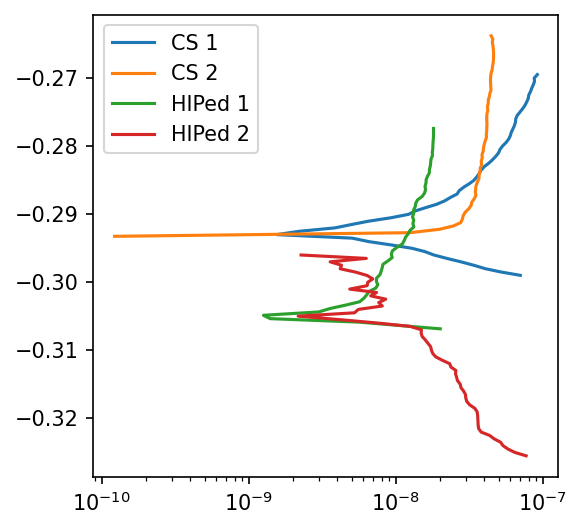

In [60]:
fig, ax = plt.subplots(figsize=(4,4), sharex=True, dpi=150)

ax.semilogx(np.abs(LPR_CS_1_df["i"].to_numpy()), LPR_CS_1_df["E"].to_numpy()-0.125, markersize=5, label="CS 1")
ax.semilogx(np.abs(LPR_CS_2_df["i"].to_numpy()), LPR_CS_2_df["E"].to_numpy(), markersize=5, label="CS 2")
#ax.semilogx(np.abs(LPR_CS_3_df["i"].to_numpy()), LPR_CS_3_df["E"].to_numpy(), markersize=5, label="CS 3")
ax.semilogx(np.abs(LPR_HS_1_df["i"].to_numpy()), LPR_HS_1_df["E"].to_numpy()+0.03+0.01+0.002, markersize=5, label="HIPed 1")
ax.semilogx(np.abs(LPR_HS_2_df["i"].to_numpy()), LPR_HS_2_df["E"].to_numpy(), markersize=5, label="HIPed 2")
ax.legend()
plt.show()